In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE
from PIL import Image
import os
from glob import glob
import shutil


# def load_and_preprocess_image(image_path):
#     img = Image.open(image_path).convert('L')
#     img_array = np.array(img)
#     img_flat = img_array.flatten()
#     return img_flat, img_array.shape

# def apply_pca_and_tsne(img_flat1, img_flat2, n_components_pca=50):
#     # Combine the flattened images
#     combined_data = np.vstack((img_flat1.reshape(1, -1), img_flat2.reshape(1, -1)))
    
#     # Apply PCA
#     n_components_pca = min(n_components_pca, combined_data.shape[0], combined_data.shape[1])
#     pca = PCA(n_components=n_components_pca)
#     pca_result = pca.fit_transform(combined_data)
    
#     # Apply t-SNE on the PCA results
#     tsne = TSNE(n_components=2, perplexity=1, random_state=42)
#     tsne_result = tsne.fit_transform(pca_result)
    
#     return pca, tsne_result

# def plot_comparison(img1, img2, shape, pca, tsne_result):
#     fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
#     # Plot original images
#     axes[0, 0].imshow(img1.reshape(shape), cmap='gray')
#     axes[0, 0].set_title('Image 1')
#     axes[0, 1].imshow(img2.reshape(shape), cmap='gray')
#     axes[0, 1].set_title('Image 2')
    
#     # Plot explained variance ratio from PCA
#     axes[1, 0].plot(pca.explained_variance_ratio_)
#     axes[1, 0].set_xlabel('Principal Components')
#     axes[1, 0].set_ylabel('Explained Variance Ratio')
#     axes[1, 0].set_title('PCA: Explained Variance Ratio')
    
#     # Plot t-SNE results
#     axes[1, 1].scatter(tsne_result[0, 0], tsne_result[0, 1], c='r', label='Image 1')
#     axes[1, 1].scatter(tsne_result[1, 0], tsne_result[1, 1], c='b', label='Image 2')
#     axes[1, 1].set_xlabel('t-SNE feature 1')
#     axes[1, 1].set_ylabel('t-SNE feature 2')
#     axes[1, 1].legend()
#     axes[1, 1].set_title('t-SNE Visualization')
    
#     plt.tight_layout()
#     plt.show()

# # Main execution
# image_path1 = '/media/sarvagya-pc/2TB HDD/Balgrist/full_MPM_images/wp1/BCA-001/ses-03/axial/img_111.png'
# image_path2 = '/media/sarvagya-pc/2TB HDD/Balgrist/full_MPM_images/wp1/BCA-001/ses-01/axial/img_111.png'

# img1_flat, shape = load_and_preprocess_image(image_path1)
# img2_flat, _ = load_and_preprocess_image(image_path2)

# pca, tsne_result = apply_pca_and_tsne(img1_flat, img2_flat)

# plot_comparison(img1_flat, img2_flat, shape, pca, tsne_result)

In [27]:
image_path1 = "/media/sarvagya-pc/2TB HDD/Balgrist/full_MPM_images/wp1/BCA-001/ses-01/axial/img_099.png"
img = Image.open(image_path1).convert('L')
img = np.array(img)
image_bw = img/img.max()
print(img.shape)
print(image_bw.max())

(155, 123)
1.0


Number of components explaining 95% variance: 15


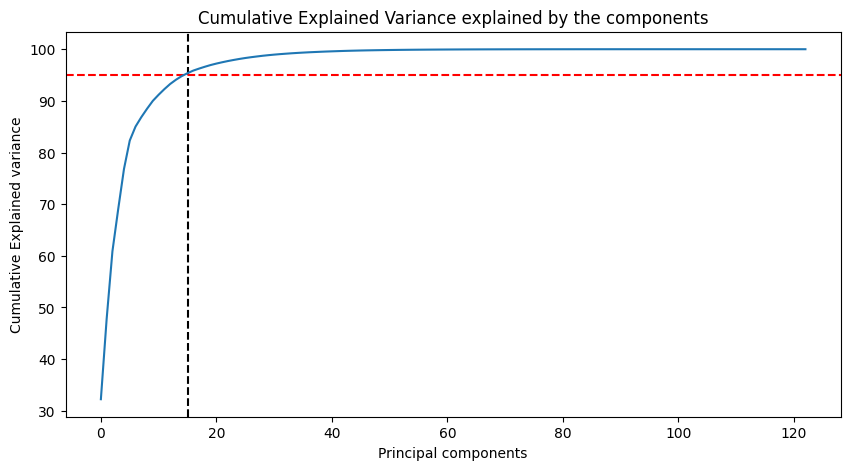

In [6]:
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

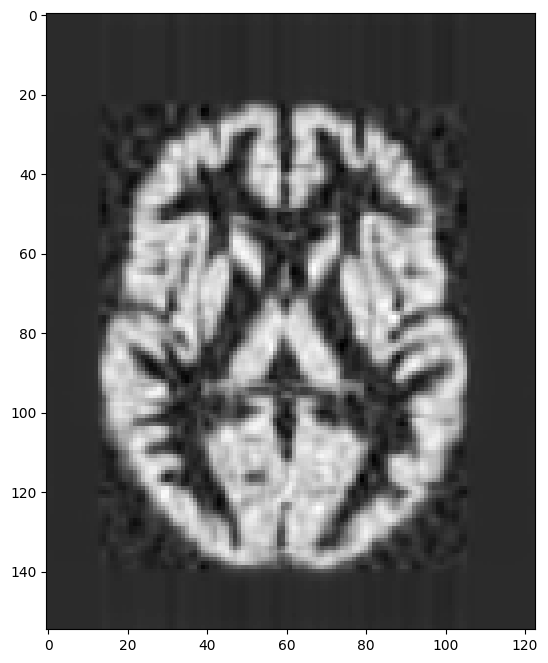

In [28]:
ipca = IncrementalPCA(n_components=15)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

In [36]:
# np.save("test_image.npy", image_recon)
x = np.load("test_image.npy")

In [44]:
folder = "/media/sarvagya-pc/2TB HDD/Balgrist/full_MPM_images/wp1/"
subs = sorted(os.listdir(folder))
for sub in subs:
    print(sub)
    subject_path = os.path.join(folder, sub)
    sessions = sorted([s for s in os.listdir(subject_path) if os.path.isdir(os.path.join(subject_path, s))])
    print(sessions)
    for ses in sessions:
        save_folder = subject_path+'/'+ses+'/PCA/axial/'
        if os.path.exists(save_folder):
            # shutil.rmtree(save_folder)
            img_files = sorted(glob(subject_path+'/'+ses+'/axial/*.png'))
            count = 0
            for i in img_files:
                img = Image.open(i).convert('L')
                img = np.array(img)
                image_bw = img/img.max()
                ipca = IncrementalPCA(n_components=15)
                image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
                np.save(save_folder+f"/img_{count:03}_normalized.npy", image_recon)
                # plt.imsave(image_recon, save_folder)
                # print(image_recon.dtype)
                count+=1
                
        else:
            os.makedirs(save_folder)


BCA-001
['ses-01', 'ses-03']
BCA-002
['ses-02', 'ses-03']
BSL-001
['ses-02', 'ses-03']
BSL-002
['ses-01', 'ses-02', 'ses-03']
BSL-003
['ses-01', 'ses-02', 'ses-03']
BSL-004
['ses-01', 'ses-02']
BSL-005
['ses-01', 'ses-02', 'ses-03']
BSL-006
['ses-01', 'ses-03']
HDG-002
['ses-01', 'ses-02']
HDG-004
['ses-01', 'ses-02', 'ses-03']
HDG-006
['ses-01', 'ses-02', 'ses-03']
HDG-007
['ses-02', 'ses-03']
HDG-008
['ses-01', 'ses-02', 'ses-03']
HDG-009
['ses-02', 'ses-03']
HDG-011
['ses-01', 'ses-02']
HDG-012
['ses-01', 'ses-02', 'ses-03']
HDG-014
['ses-01', 'ses-02', 'ses-03']
HDG-015
['ses-01', 'ses-02']
HDG-018
['ses-01', 'ses-02']
HLE-003
['ses-01', 'ses-02', 'ses-03']
HLE-004
['ses-01', 'ses-02', 'ses-03']
HLE-005
['ses-01', 'ses-02', 'ses-03']
HLE-006
['ses-01', 'ses-03']
HLE-007
['ses-01', 'ses-02']
HLE-008
['ses-01', 'ses-03']
HLE-011
['ses-01', 'ses-02', 'ses-03']
HLE-012
['ses-01', 'ses-02', 'ses-03']
HLE-014
['ses-01', 'ses-03']
HLE-015
['ses-01', 'ses-02', 'ses-03']
HLE-016
['ses-01', 